#### ReLU函数计算速度快，加快了网络的训练。不过，如果梯度过大，导致很多负数，由于负数部分值为0，这些神经元将无法激活
#### 当激活值的均值非0时，就会对下一层造成一个bias，如果激活值之间不会相互抵消（即均值非0），会导致下一层的激活单元有bias shift。如此叠加，单元越多时，bias shift就会越大。
#### SELU激活函数将输出的平均值接近0，从而加快模型收敛，类似于Batch Normalization的效果，计算复杂度更低

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [5]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)


In [6]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_train_scaler = stand.fit_transform(x_train.reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaler = stand.transform(x_valid.reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaler = stand.transform(x_test.reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [7]:
print(x_train_scaler.shape, y_train.shape)
print(x_test_scaler.shape, y_test.shape)

(48000, 28, 28, 1) (48000,)
(10000, 28, 28, 1) (10000,)


In [8]:
model = keras.models.Sequential()

# 一次
model.add(
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, activation='selu', padding="same", input_shape=[28, 28, 1]))
model.add(
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, activation='selu', padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 二次
model.add(
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, activation='selu', padding="same"))
model.add(
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, activation='selu', padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 三次
model.add(
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, activation='selu', padding="same"))
model.add(
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, activation='selu', padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="selu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [10]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
model.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(0.01), metrics = ["accuracy"])
history = model.fit(x_train_scaler, y_train, 
                    validation_data=(x_valid_scaler, y_valid), 
                    epochs=5, 
                    callbacks=callbacks)

Epoch 1/5
1500/1500 [==============================] - 221s 148ms/step - loss: 0.4487 - accuracy: 0.8383 - val_loss: 0.3354 - val_accuracy: 0.8800
Epoch 2/5
1500/1500 [==============================] - 233s 155ms/step - loss: 0.2996 - accuracy: 0.8923 - val_loss: 0.2772 - val_accuracy: 0.9004 - loss: 0.3031 - ETA: 16s - loss: 0.30 - ETA: 13s - loss: 0.3018 -   - ETA: 7s - loss: 0.3 - ETA: 5s - loss: 0.300 - ETA: 1s - loss: 0.2998 - 
Epoch 3/5
1500/1500 [==============================] - 229s 153ms/step - loss: 0.2493 - accuracy: 0.9094 - val_loss: 0.2707 - val_accuracy: 0.9024s - loss: 0.2489 - accuracy: 0.9 - ETA: 18s - loss: 0.2501 - accuracy - ETA: 17s - loss: 0.2502 - accuracy: - ETA: 16s - loss: 0.2503 - accurac - - ETA: 9s - loss: 0.2 - ETA: 4s - loss: 0
Epoch 4/5
1500/1500 [==============================] - 197s 132ms/step - loss: 0.2124 - accuracy: 0.9230 - val_loss: 0.2596 - val_accuracy: 0.9082
Epoch 5/5
1500/1500 [==============================] - 154s 103ms/step - loss: 0.1

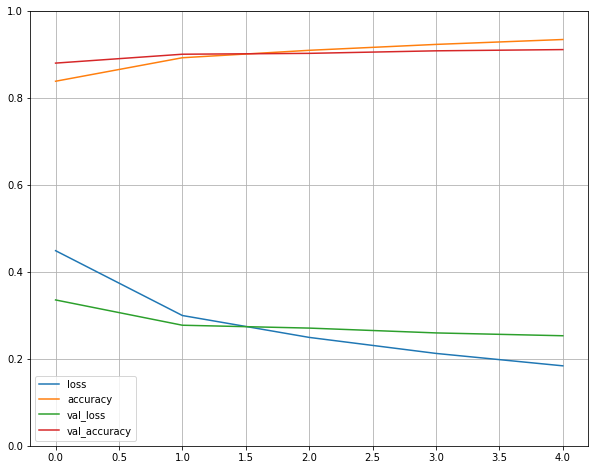

In [11]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,8))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [12]:
model.evaluate(x_test_scaler, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.2765 - accuracy: 0.9003


[0.27653881907463074, 0.9003000259399414]

### SELU 与 RELU图形

In [13]:
x = np.arange(-10.0, 10.0)

In [14]:
y_relu = [item if item > 0 else 0 for item in x]

In [15]:
alpha = 0.5
y_selu = [item if item > 0 else alpha * (np.exp(item) - 1) for item in x]

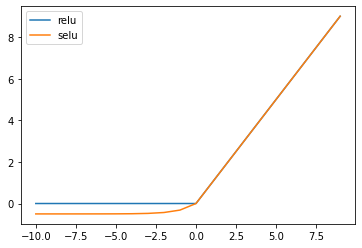

In [16]:
plt.plot(x, y_relu, label="relu")
plt.plot(x, y_selu, label="selu")
plt.legend()